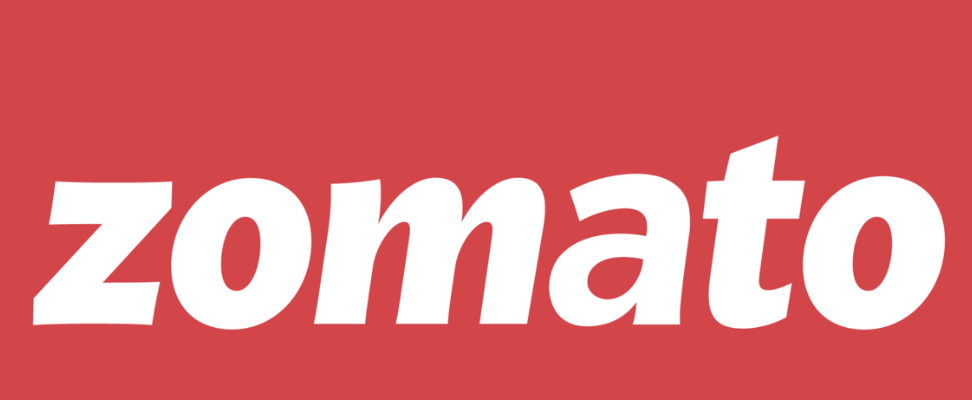

**About the data**

The **Zomato Restaurants Dataset for Metropolitan** Areas of 13 cities in India provides comprehensive information about restaurants in these urban centers. This dataset consists of 12 columns, each representing a specific attribute of the restaurants.

The columns in the dataset are as follows:


---


*   url - url of the restaurant

*   address - address of the restaurant

*   name - name of the restaurant

*   online_order - Does the restaurant accepts online order (Yes/No)?

*   book_table - Does the restaurant accepts table reservation (Yes/No)?

*   rate - Overall Rating of the restaurant (Out of 5)

*   votes - Overall votes of the restaurant

*   phone - Phone number of the restaurant

*   location - Location of the restaurant

*   rest_type - Whether it's a Casual Dining or a Cafe etc.

*   dish_liked - Most liked food of the restaurant

*   cuisines - Cuisines offered by the restaurant

*   approx_cost(for two people) - Approx cost for two people

*   reviews_list - A list containing all the reviews of the restaurant

*   menu_item - Menu of the restaurant

*   listed_in(type) - The category restaurant is listed in, eg. Buffet, BBQ etc.

*   listed_in(city) - The location of the restaurant



---




#Load Dataset

In [1]:
!gdown 1TOyYzH2IIGaEDZDrRe8RrWQLUDA12LiA

Downloading...
From (original): https://drive.google.com/uc?id=1TOyYzH2IIGaEDZDrRe8RrWQLUDA12LiA
From (redirected): https://drive.google.com/uc?id=1TOyYzH2IIGaEDZDrRe8RrWQLUDA12LiA&confirm=t&uuid=84b45c09-6fc1-476b-984c-13cc3da58649
To: /content/zomato_dataset_user.csv
100% 574M/574M [00:06<00:00, 83.5MB/s]


In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, ast, re
from itertools import chain
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from folium.plugins import FloatImage
import folium

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('zomato_dataset_user.csv')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [5]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} features')

The dataset contains 51717 rows and 17 features


# EDA

As **(address,name)** pair should be the unique identifier, let's first of all drop duplicate values.

In [6]:
df = df.drop_duplicates(subset=['address','name']).reset_index(drop=True)
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [7]:
print(f'After dropping duplicate rows, the dataset contains {df.shape[0]} rows and {df.shape[1]} features')

After dropping duplicate rows, the dataset contains 12499 rows and 17 features


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499 entries, 0 to 12498
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          12499 non-null  object
 1   address                      12499 non-null  object
 2   name                         12499 non-null  object
 3   online_order                 12499 non-null  object
 4   book_table                   12499 non-null  object
 5   rate                         10094 non-null  object
 6   votes                        12499 non-null  int64 
 7   phone                        12232 non-null  object
 8   location                     12490 non-null  object
 9   rest_type                    12436 non-null  object
 10  dish_liked                   4608 non-null   object
 11  cuisines                     12480 non-null  object
 12  approx_cost(for two people)  12440 non-null  object
 13  reviews_list                 12

In [9]:
np.round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
votes,12499.0,180.68,591.71,0.0,0.0,24.0,120.0,16345.0


In [10]:
df.isna().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           2405
votes                             0
phone                           267
location                          9
rest_type                        63
dish_liked                     7891
cuisines                         19
approx_cost(for two people)      59
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
np.round((df.isna().sum()/len(df))*100,2)

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           19.24
votes                           0.00
phone                           2.14
location                        0.07
rest_type                       0.50
dish_liked                     63.13
cuisines                        0.15
approx_cost(for two people)     0.47
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

**Insight**


---


*   It appears that *dish_liked* might not be a helpful feature as it contains 63% null values.

*   Also, *rate* has 19% null values. So, again it appears that this column needs to be imputed.


---

But, this dataset needs a different treatment.

*   We need to see that are these missing values actually meaningful in any way.

*   Do we need to use standard imputation techniques or explore other options?

---




#Handling Missing values and Feature Engineering

**Insight**


---

*   ***dish_liked*** has 63% of missing values.

*   But, this may be due to the hypothesis that if the rating of the restaurant is poor, that's likely due to poor food quality or taste. In this case, ***dish_liked*** would be missing.

So, let's analyse the ***dish_liked*** from top restaurant.

**The hypothesis is top food items will belong to top rated restaurants.**


---



##To find, top rated restaurants, we'll analyse the **rate** feature

In [12]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [13]:
df['rating']=df['rate'].apply(lambda x : str(x).split('/')[0])
df['rating']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
12494     nan
12495    4.2 
12496    3.3 
12497    2.5 
12498     nan
Name: rating, Length: 12499, dtype: object

In [14]:
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '-', '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ',
       '4.2 ', '3.5 ', '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ',
       '4.9', '2.1', '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ',
       '3.0 ', '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ',
       '2.0 '], dtype=object)

In [15]:
df['rating']=df['rating'].replace({'NEW':0,'nan':0,'-':0,', ':0})
df['rating'].astype(float)
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.6 ', '4.8', '3.9 ', '3.7 ', '2.9 ', '2.8 ', '4.2 ', '3.5 ',
       '4.1 ', '2.7 ', '3.4 ', '3.3 ', '3.2 ', '4.3 ', '4.9', '2.1',
       '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '4.6 ', '3.1 ', '3.0 ',
       '2.6 ', '2.3 ', '2.5 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ', '2.0 '],
      dtype=object)

In [16]:
df['rating'] = df['rating'].apply(lambda x : float(str(x).strip()))
df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [17]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:str(x).replace(',',''))
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
12494     300.0
12495    1800.0
12496     350.0
12497     800.0
12498    2000.0
Name: approx_cost(for two people), Length: 12499, dtype: float64

In [18]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8


**Creating a separate dataset for those restaurants whose rating is 4+.**

In [19]:
top_df = df.loc[df['rating']>=4][['name','online_order','book_table','rating','votes','location','rest_type','dish_liked','cuisines','approx_cost(for two people)','listed_in(type)','listed_in(city)','url']]
top_df.head(3)

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),url
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,https://www.zomato.com/bangalore/jalsa-banasha...
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,https://www.zomato.com/bangalore/spice-elephan...
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes,Banashankari,https://www.zomato.com/bangalore/onesta-banash...


In [20]:
print(f'We have {top_df.shape[0]} rows and {top_df.shape[1]} features now')

We have 2117 rows and 13 features now


In [21]:
print('Percentage of null values in each feature in top_df')
np.round((top_df.isna().sum()/len(top_df))*100,2)

Percentage of null values in each feature in top_df


name                           0.00
online_order                   0.00
book_table                     0.00
rating                         0.00
votes                          0.00
location                       0.00
rest_type                      0.09
dish_liked                     4.06
cuisines                       0.00
approx_cost(for two people)    0.38
listed_in(type)                0.00
listed_in(city)                0.00
url                            0.00
dtype: float64

**Insight**


---

*   On analysing the restaurants that are rated 4+, we see that *dish_liked* has only 4% missing values. This confirms that our hypothesis is True.

*   *dish_liked* would be most likely a missing value in case of poor rated restaurants.


---



## Feature Engineering

In [22]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:str(x).replace(',',''))
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
12494     300.0
12495    1800.0
12496     350.0
12497     800.0
12498    2000.0
Name: approx_cost(for two people), Length: 12499, dtype: float64

In [23]:
unique_locations = df['location'].unique()
unique_locations.astype(str)
unique_locations = pd.Series(unique_locations)
unique_locations=unique_locations.fillna('unknown_location')

In [24]:
unique_locations[unique_locations.str.contains('Koramangala')]

24    Koramangala 5th Block
25    Koramangala 8th Block
27    Koramangala 7th Block
29    Koramangala 4th Block
35    Koramangala 1st Block
59    Koramangala 6th Block
68    Koramangala 2nd Block
69    Koramangala 3rd Block
70              Koramangala
dtype: object

---

On careful inspection, we found that there are locations named 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block', 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block' and 'Koramangala' are all the same location, i.e, 'Koramangala' and needs to be replaced that way.

---

In [25]:
df['location']=df['location'].fillna('unknown_location')

In [26]:
df['location']=np.where(df['location'].str.contains('Koramangala'),'Koramangala',df['location'])

In [27]:
df[df['location'].str.contains('Koramangala')]['location']

1711     Koramangala
1715     Koramangala
1762     Koramangala
1795     Koramangala
1803     Koramangala
            ...     
10038    Koramangala
10039    Koramangala
10043    Koramangala
10044    Koramangala
10045    Koramangala
Name: location, Length: 948, dtype: object

In [28]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'unknown_location', 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala', 'Richmond Road',
       'Jalahalli', 'Bellandur', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old Madras Road', 'Malleshwaram',
       'Seshadripuram', 'Kammanahalli', 'Majestic', '

## Top dishes

---


*   We now see that only 4% of the top rated restaurants have **dish_liked** missing. This confirms our hypothesis that the overall top food item can be obtained by analysing top rated restaurants.

*   We also observe that each restaurant has a list of top dishes.

*   So, to analyse top food item, we'll have to **explode** *dish_liked* for each restaurant *name*.


---










In [29]:
top_dishes_list = list(top_df['dish_liked'].apply(lambda x : str(x).split(', ')))
top_dishes_list[:5]

[['Pasta',
  'Lunch Buffet',
  'Masala Papad',
  'Paneer Lajawab',
  'Tomato Shorba',
  'Dum Biryani',
  'Sweet Corn Soup'],
 ['Momos',
  'Lunch Buffet',
  'Chocolate Nirvana',
  'Thai Green Curry',
  'Paneer Tikka',
  'Dum Biryani',
  'Chicken Biryani'],
 ['Farmhouse Pizza',
  'Chocolate Banana',
  'Virgin Mojito',
  'Pasta',
  'Paneer Tikka',
  'Lime Soda',
  'Prawn Pizza'],
 ['Pizza', 'Mocktails', 'Coffee', 'Nachos', 'Salad', 'Pasta', 'Sandwiches'],
 ['Waffles',
  'Pasta',
  'Coleslaw Sandwich',
  'Choco Waffle',
  'Tacos',
  'Momos',
  'Cheese Nachos']]

In [30]:
top_dish_df = top_df[['name']]
top_dish_df['top_dishes'] = top_dishes_list
top_dish_df = top_dish_df.explode('top_dishes')
top_dish_df.head(10)

,name,top_dishes
0,Jalsa,Pasta
0,Jalsa,Lunch Buffet
0,Jalsa,Masala Papad
0,Jalsa,Paneer Lajawab
0,Jalsa,Tomato Shorba
0,Jalsa,Dum Biryani
0,Jalsa,Sweet Corn Soup
1,Spice Elephant,Momos
1,Spice Elephant,Lunch Buffet
1,Spice Elephant,Chocolate Nirvana


In [31]:
top_dish_df.shape

(12572, 2)

In [32]:
pd.DataFrame(top_dish_df.value_counts(ascending=False)).reset_index().rename(columns={'0':'count'}).head(60)

,name,top_dishes,0
0,Corner House Ice Cream,Hot Chocolate Fudge,17
1,BOX8- Desi Meals,Dal Makhani,13
2,BOX8- Desi Meals,Paratha,13
3,Behrouz Biryani,Gulab Jamun,11
4,Faasos,Rolls,11
5,BOX8- Desi Meals,Salad,11
6,Mojo Pizza - 2X Toppings,Garlic Bread,11
7,BOX8- Desi Meals,Sandwiches,9
8,Onesta,Pasta,9
9,Leon Grill,Burgers,9


After carefully observing the above dataframe, we can conclude the list of top dishes for favorite cuisines.

In [33]:
data = {'Category':['Ice cream', 'North Indian', 'Sweets', 'Rolls', 'Salads', 'Snacks', 'Pasta', 'American', 'Biryani', 'Bowls', 'Pizza', 'Chicken Items', 'South Indian'],
        'Restaurant_name':['CornerHouse', 'BOX8', 'BehrouzBiryani', 'Faasos', 'BOX8', 'BOX8', 'Onesta', 'LeonGrill', 'BOX8', 'CaliforniaBurrito', 'MojoPizza', 'EmpireRestaurant', 'MTR'],
        'Dish_name':['HotChocolateFudge', 'DalMakhani', 'GulabJamun', 'VeggieWrap', 'Salads', 'Sandwiches', 'Pasta', 'Burgers', 'Biryani', 'RiceBowl', 'VeggiePizza', 'ButterChicken', 'RavaIdli']}
top_dishes_df = pd.DataFrame(data)
top_dishes_df

,Category,Restaurant_name,Dish_name
0,Ice cream,CornerHouse,HotChocolateFudge
1,North Indian,BOX8,DalMakhani
2,Sweets,BehrouzBiryani,GulabJamun
3,Rolls,Faasos,VeggieWrap
4,Salads,BOX8,Salads
5,Snacks,BOX8,Sandwiches
6,Pasta,Onesta,Pasta
7,American,LeonGrill,Burgers
8,Biryani,BOX8,Biryani
9,Bowls,CaliforniaBurrito,RiceBowl


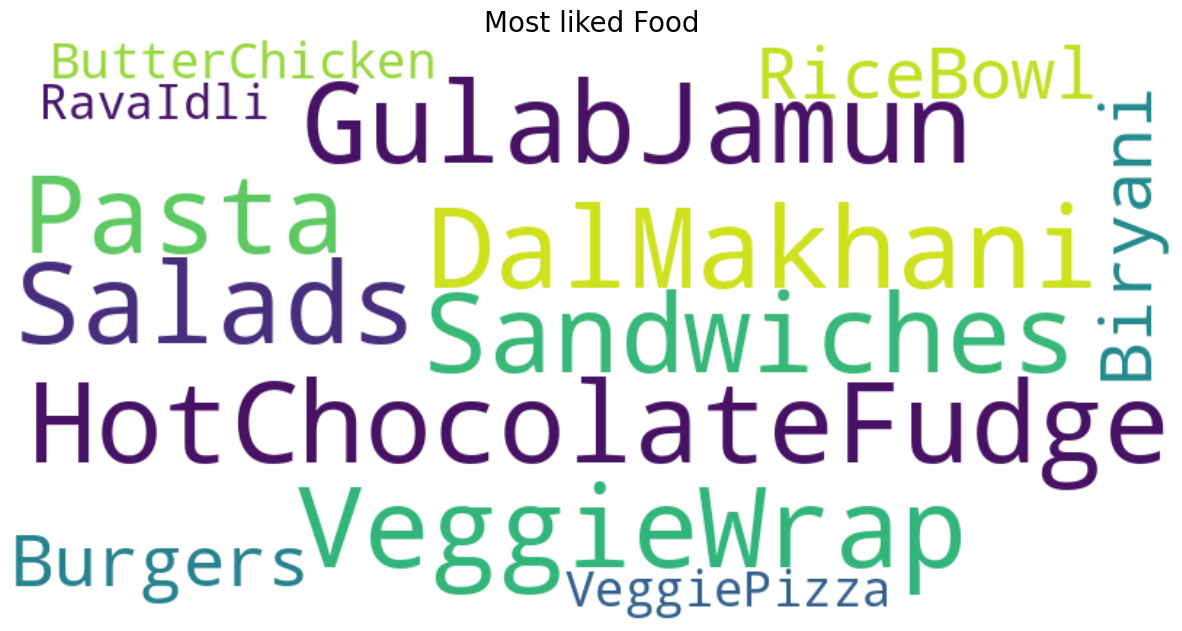

In [34]:
text_data = ' '.join(top_dishes_df['Dish_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('Most liked Food', fontsize=20)
plt.show()

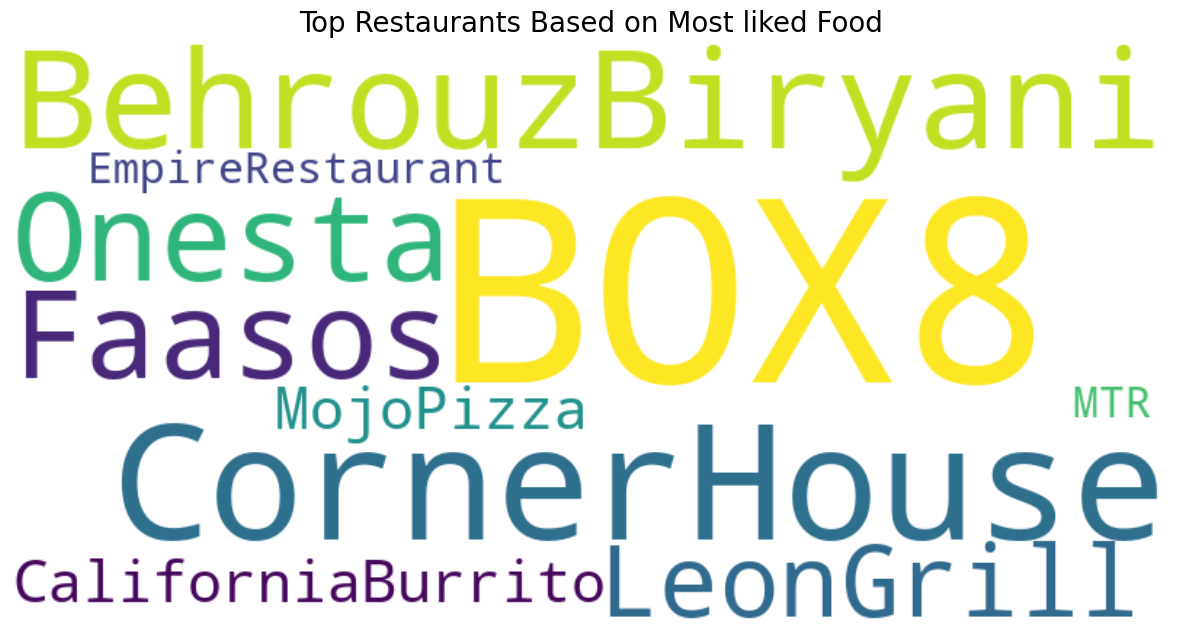

In [35]:
text_data = ' '.join(top_dishes_df['Restaurant_name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('Top Restaurants Based on Most liked Food', fontsize=20)
plt.show()

## Top Restaurants

In [36]:
top_df.head(3)

,name,online_order,book_table,rating,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),url
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,https://www.zomato.com/bangalore/jalsa-banasha...
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,https://www.zomato.com/bangalore/spice-elephan...
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes,Banashankari,https://www.zomato.com/bangalore/onesta-banash...


In [37]:
top_vote_df = top_df.sort_values(by='votes',ascending=False).head(50)[['name','votes','approx_cost(for two people)']]
print(f"Shape before group by : {top_vote_df.shape}")
top_vote_df=top_vote_df.groupby('name').aggregate({'approx_cost(for two people)':'median', 'votes':'median'}).reset_index()
print(f"Shape after group by : {top_vote_df.shape}")

Shape before group by : (50, 3)
Shape after group by : (39, 3)


In [38]:
top_vote_df

,name,approx_cost(for two people),votes
0,AB's - Absolute Barbecues,1600.0,9248.0
1,Arbor Brewing Company,2000.0,8375.0
2,Barbeque Nation,1600.0,7152.0
3,Biergarten,2400.0,6865.0
4,Big Pitcher,1800.0,9021.0
5,Brew and Barbeque - A Microbrewery Pub,1400.0,5746.0
6,Brewsky,1600.0,4309.0
7,Byg Brewski Brewing Company,1600.0,16345.0
8,CTR,150.0,4408.0
9,Chianti,1500.0,4621.5


In [39]:
top_vote_df = top_vote_df.sort_values(by='votes',ascending=False)
top_vote_df.head(2)

,name,approx_cost(for two people),votes
7,Byg Brewski Brewing Company,1600.0,16345.0
34,Toit,1500.0,14956.0


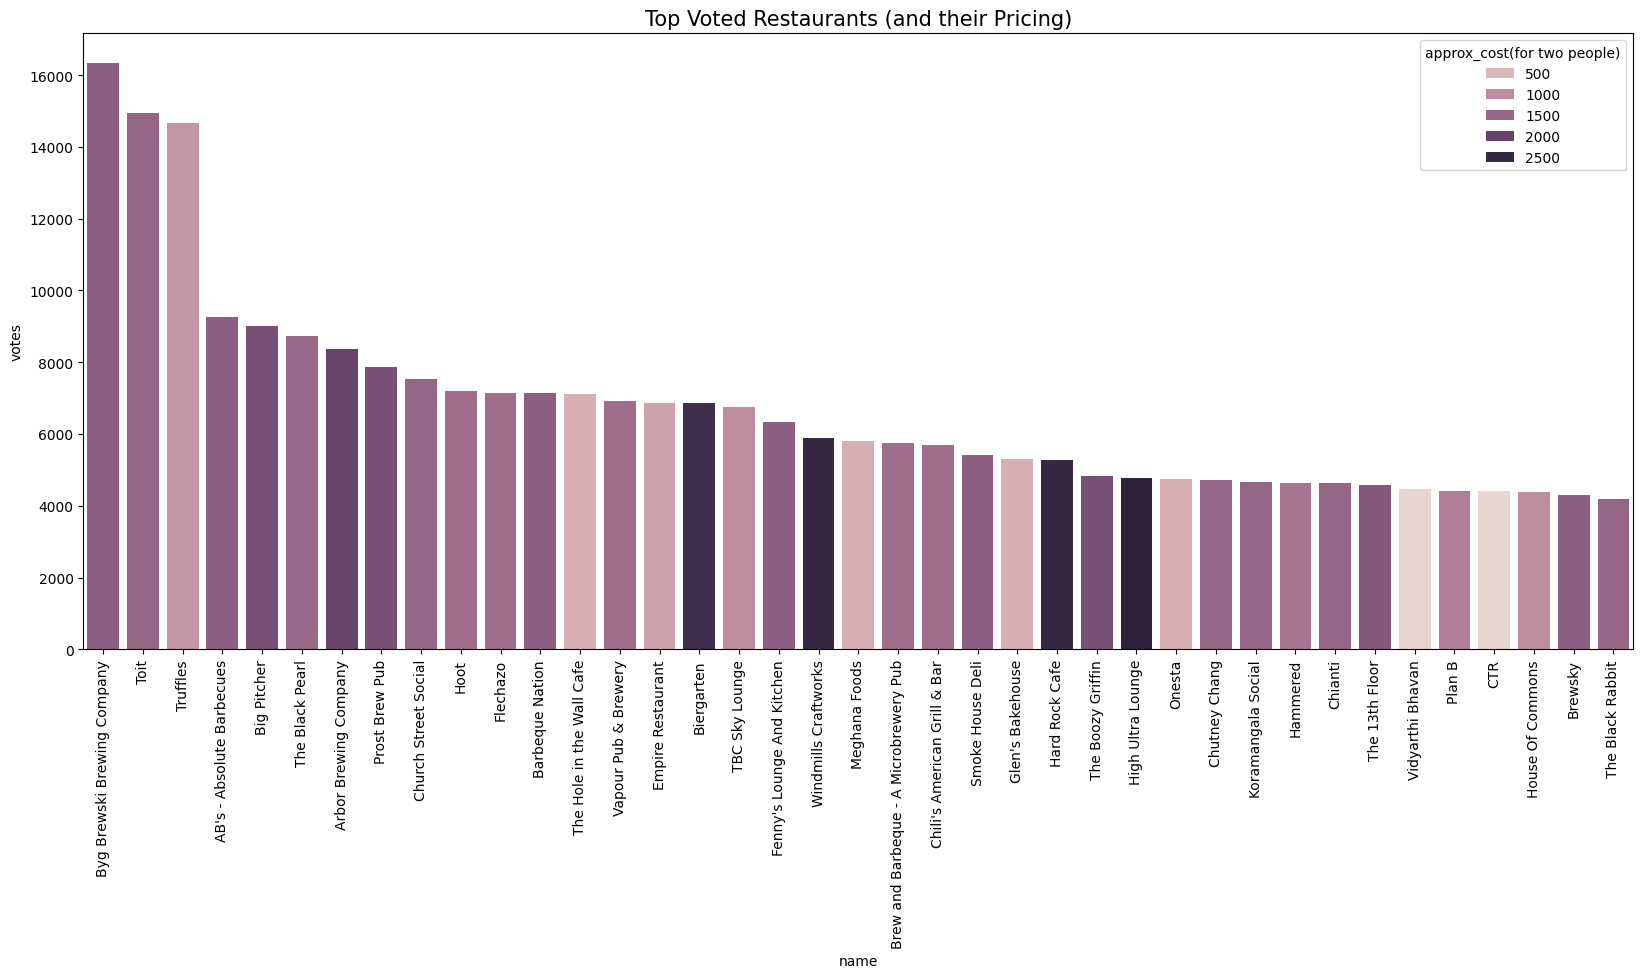

In [40]:
plt.figure(figsize=(20,8))
plt.title('Top Voted Restaurants (and their Pricing)', fontsize=15)
sns.barplot(x = 'name', y = 'votes', data = top_vote_df, hue='approx_cost(for two people)')
plt.xticks(rotation=90)
plt.show()

**Insight**


---

*   Top voted restaurants are *Byg Brewski Brewing Company*, *Toit* and *Truffles*.

*   The restaurants topping this list are all in the price range of INR 1500 or less.

*   *High Ultra Lounge*, *Hard Rock Cafe* and *Windmills Craftworks*, the most priciest ones in our list, have got less than 6000 votes.






---


We found that at index 11642, the name of restaurant needs to be corrected.

In [41]:
top_df.at[11642,'name']='Santa Spa Cuisine'



---



In [42]:
top_rated_df = top_df[['name','rating','approx_cost(for two people)']]
top_rated_df = top_rated_df.groupby('name').aggregate({'rating':'max','approx_cost(for two people)':'median'}).reset_index()
top_rated_df = top_rated_df.sort_values(by='rating',ascending=False)
top_rated_df

,name,rating,approx_cost(for two people)
509,Flechazo,4.9,1400.0
835,Milano Ice Cream,4.9,400.0
1102,Santa Spa Cuisine,4.9,1000.0
240,Byg Brewski Brewing Company,4.9,1600.0
90,Asia Kitchen By Mainland China,4.9,1500.0
...,...,...,...
1143,Shree Thali,4.0,150.0
737,Laddoos,4.0,250.0
738,Lakeview Milkbar,4.0,500.0
740,Lan Thai,4.0,800.0


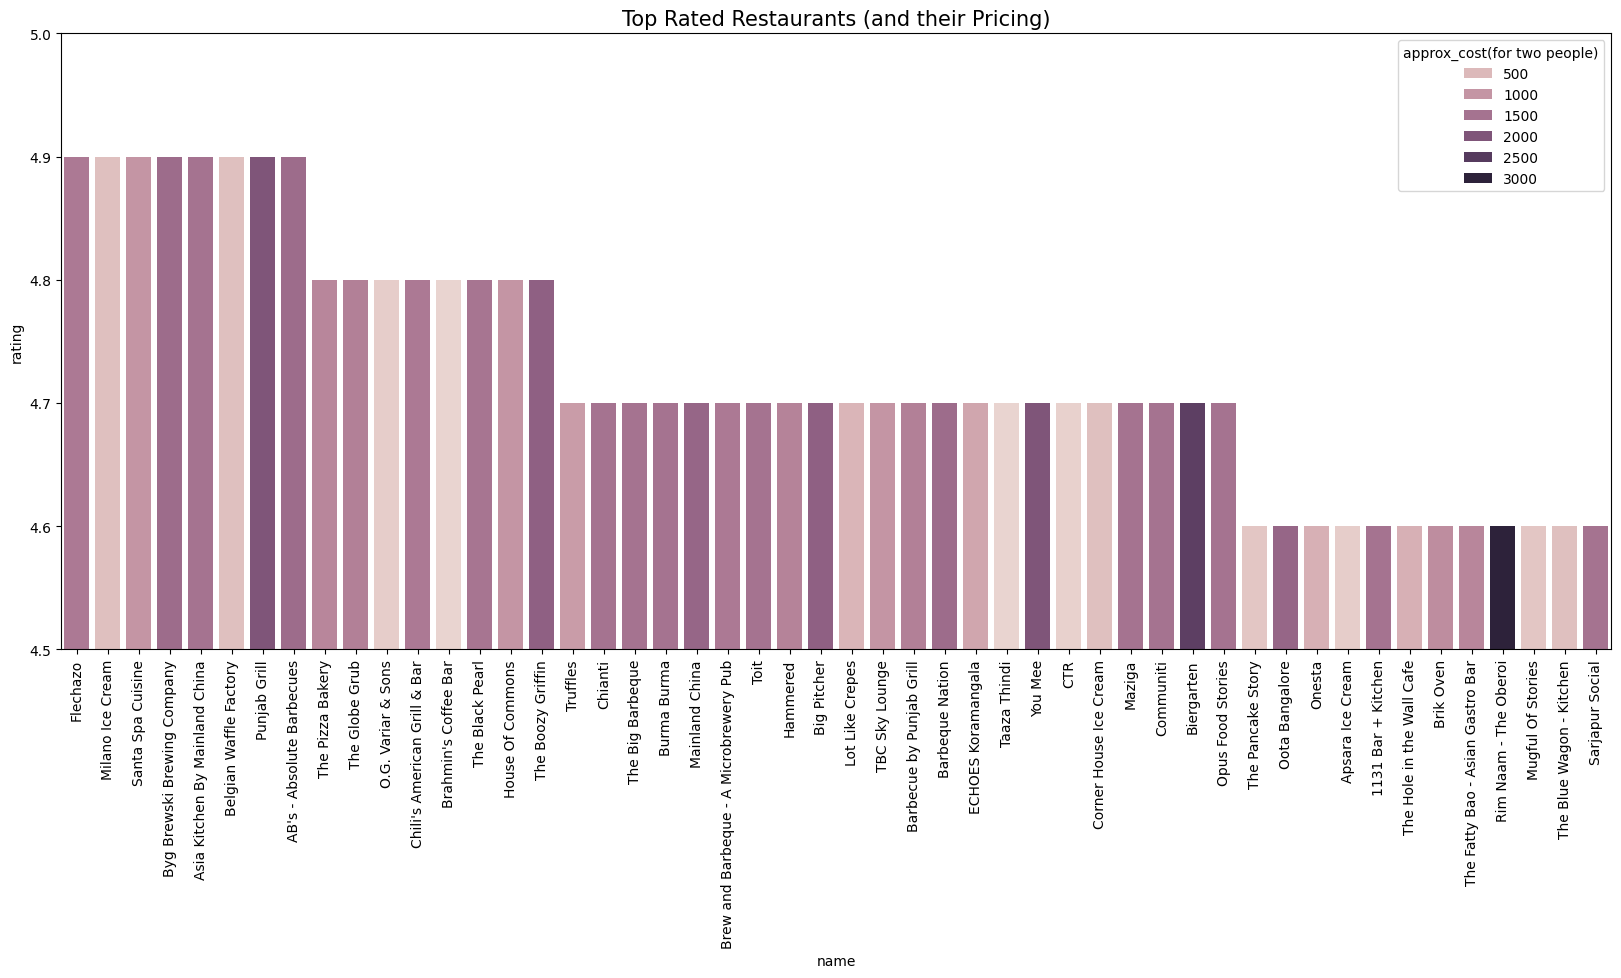

In [43]:
plt.figure(figsize=(20,8))
plt.title('Top Rated Restaurants (and their Pricing)', fontsize=15)
sns.barplot(x = 'name', y = 'rating', data = top_rated_df[:50], hue='approx_cost(for two people)')

plt.ylim(4.5,5)
plt.yticks([4.5,4.6,4.7,4.8,4.9,5])
plt.xticks(rotation=90)
plt.show()

**Insight**


---



*   The top rated restaurants are *Flechazo*, *Milano Ice Cream*, *Santa Spa Cuisine*, *Byg Brewski Brewing Company*, *Asia Kitchen by Mainland China*, *Belgian Waffle Factory*, *Punjab Grill* and *AB's - Absolute Barbecues*.

*   The priciest restaurant is *Rim Naam - The Oberoi*, but it's not the top rated.
*   All the 4.9 rated restaurants have approx_cost(for two people) less than 2000.



---


**CONCLUSION**

Higher price doesn't guarantee best rated food. Though it might guarantee a pretty decent rating. We'll see.


---




#Top Locations

In [44]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8


In [45]:
top_loc_df=df.groupby('location').aggregate({'name':'count','approx_cost(for two people)':'mean'}).reset_index().rename(columns={'name':'count'}).sort_values(by='count',ascending=False)
top_loc_df

,location,count,approx_cost(for two people)
40,Koramangala,948,528.374070
81,Whitefield,885,558.227273
19,Electronic City,730,461.714678
0,BTM,728,378.815427
22,HSR,705,440.655271
...,...,...,...
60,Rajarajeshwari Nagar,2,725.000000
56,Peenya,1,300.000000
11,Central Bangalore,1,350.000000
30,Jakkur,1,400.000000


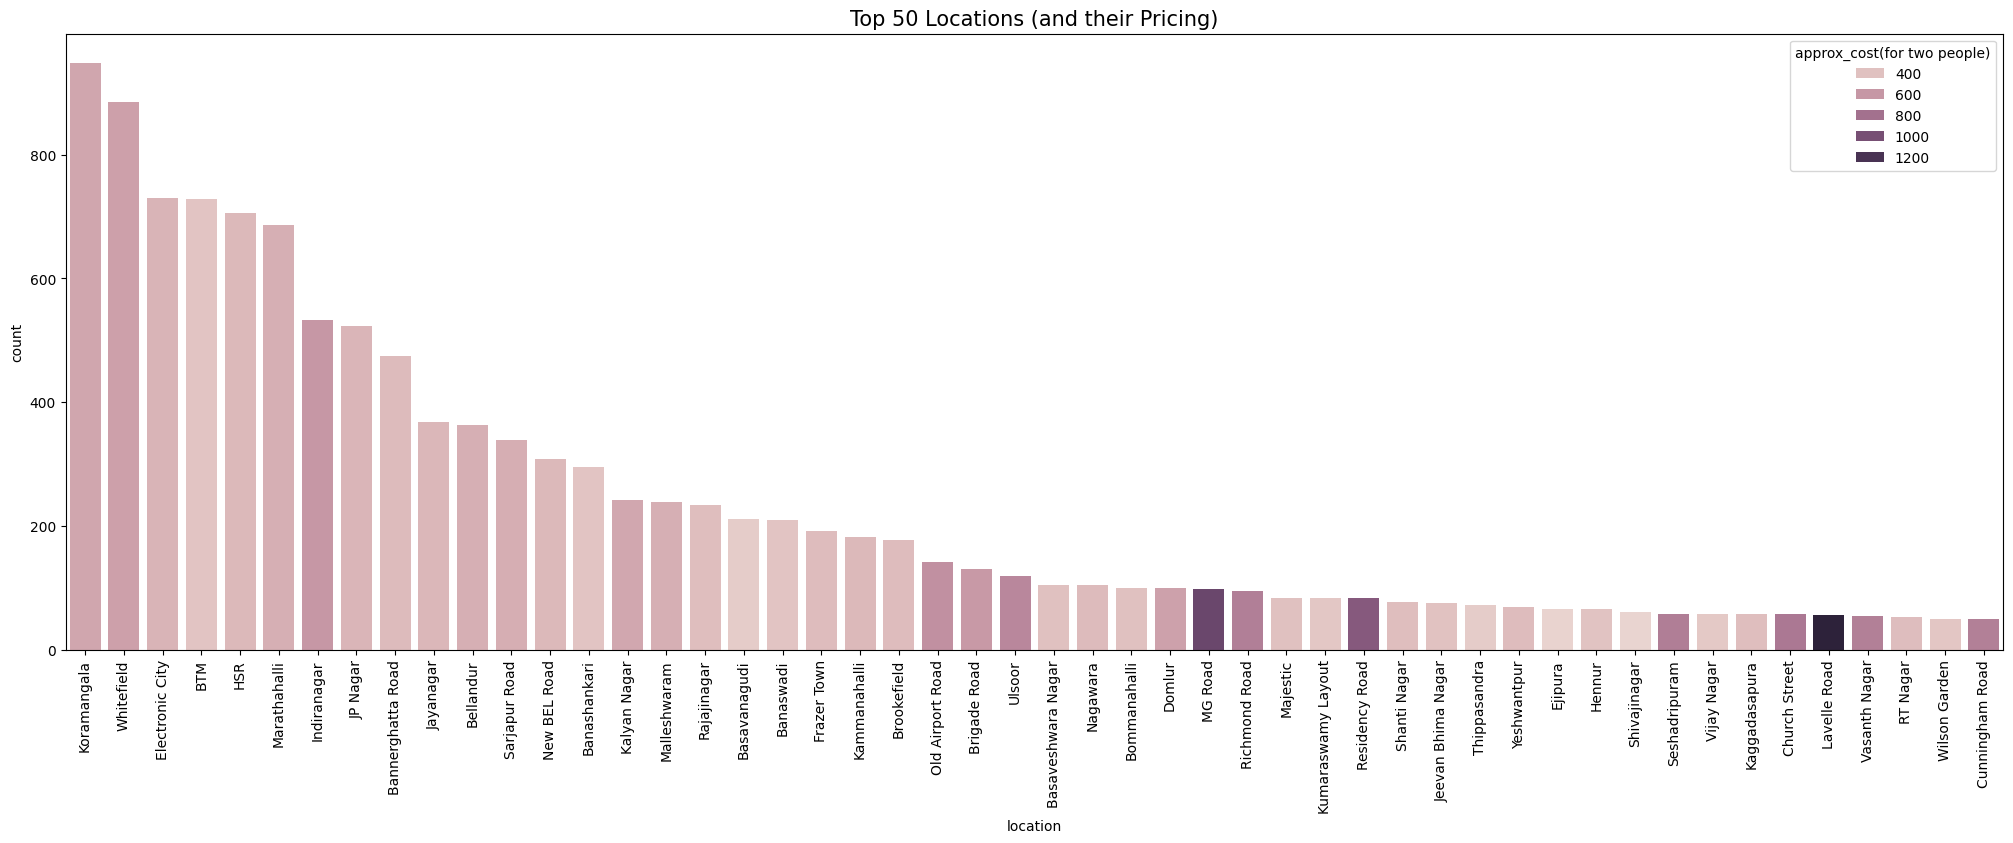

In [46]:
plt.figure(figsize=(25,8))
plt.title('Top 50 Locations (and their Pricing)', fontsize=15)
sns.barplot(x='location', y='count', data=top_loc_df[:50], hue='approx_cost(for two people)')
plt.xticks(rotation=90)
plt.show()

**Insight**


---

*   *Lavelle Road*,*MG Road* and *Residency Road* are the priciest locations.

*   *Koramangala*, *Whitefield*, *Electronic City*, *BTM*, *HSR* and *Marathahalli* are the Top locations having most number of restaurants.



---



#Top Restaurant Chain

In [47]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rating'],
      dtype='object')

In [48]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:str(x).replace(',',''))
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
12494     300.0
12495    1800.0
12496     350.0
12497     800.0
12498    2000.0
Name: approx_cost(for two people), Length: 12499, dtype: float64

In [49]:
top_rest_df = df.groupby('name').aggregate({'address':'count','approx_cost(for two people)':'mean'}).reset_index().rename(columns={'address':'count'}).sort_values(by='count',ascending=False)
top_rest_df

,name,count,approx_cost(for two people)
1320,Cafe Coffee Day,54,848.148148
3788,Just Bake,38,400.000000
2302,Domino's Pizza,38,515.789474
5817,Pizza Hut,37,736.486486
2577,Five Star Chicken,37,252.702703
...,...,...,...
3192,Hoodi Baba A Str-eat Caff,1,300.000000
3191,Hongkong Noodles,1,750.000000
3190,Hongkong Garden,1,500.000000
3189,Hong Kong Noodle,1,400.000000


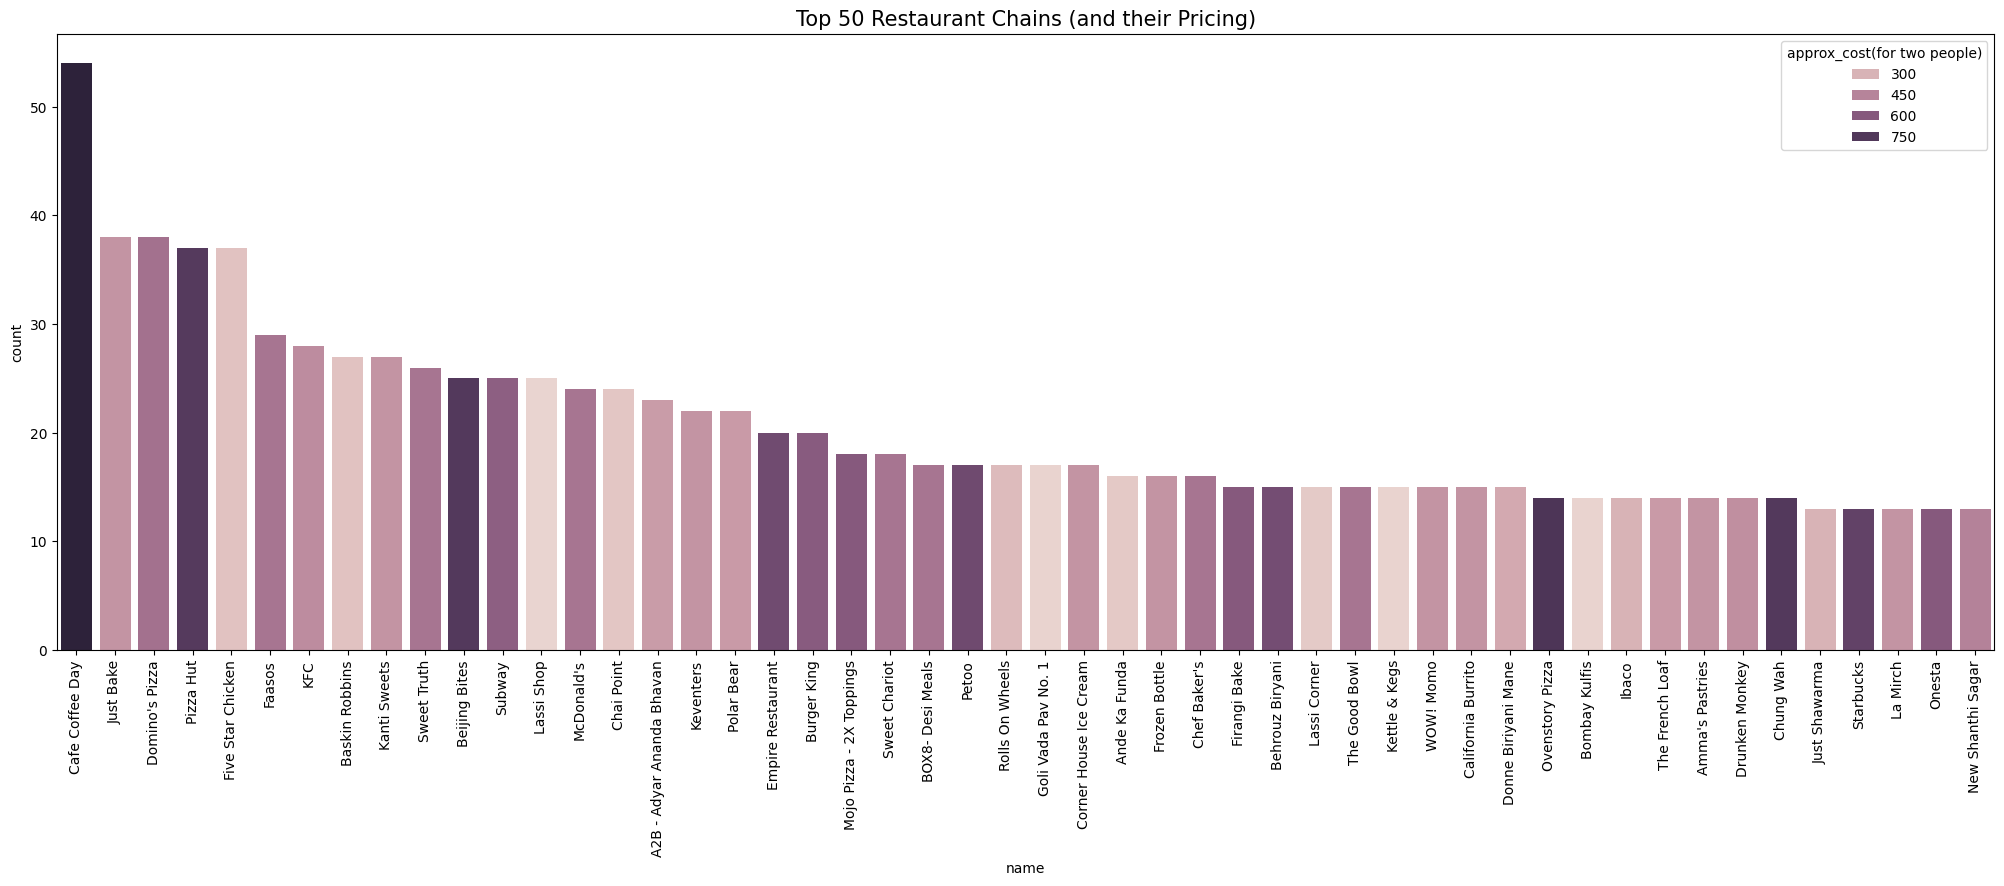

In [50]:
plt.figure(figsize=(25,8))
plt.title('Top 50 Restaurant Chains (and their Pricing)', fontsize=15)
sns.barplot(x='name', y='count', data=top_rest_df[:50], hue='approx_cost(for two people)')
plt.xticks(rotation=90)
plt.show()

**Insight**


---



*   *Cafe Coffee Day*, *Just Bake*, *Domino's Pizza*, *Pizza Hut* and *Five Star Chicken* are the ones having most number of stores.

*   *Cafe Coffee Day*, *Pizza Hut*, *Beijing Bites*, *Ovenstory Pizza*, *Chung Wah* and *Starbucks* are the priciest among Top 50 Restaurant Chains

---


# Online Order - Table Booking

In [51]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1


In [52]:
df['online_order']=df['online_order'].replace({'Yes':1,'No':0})
df['book_table']=df['book_table'].replace({'Yes':1,'No':0})
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1


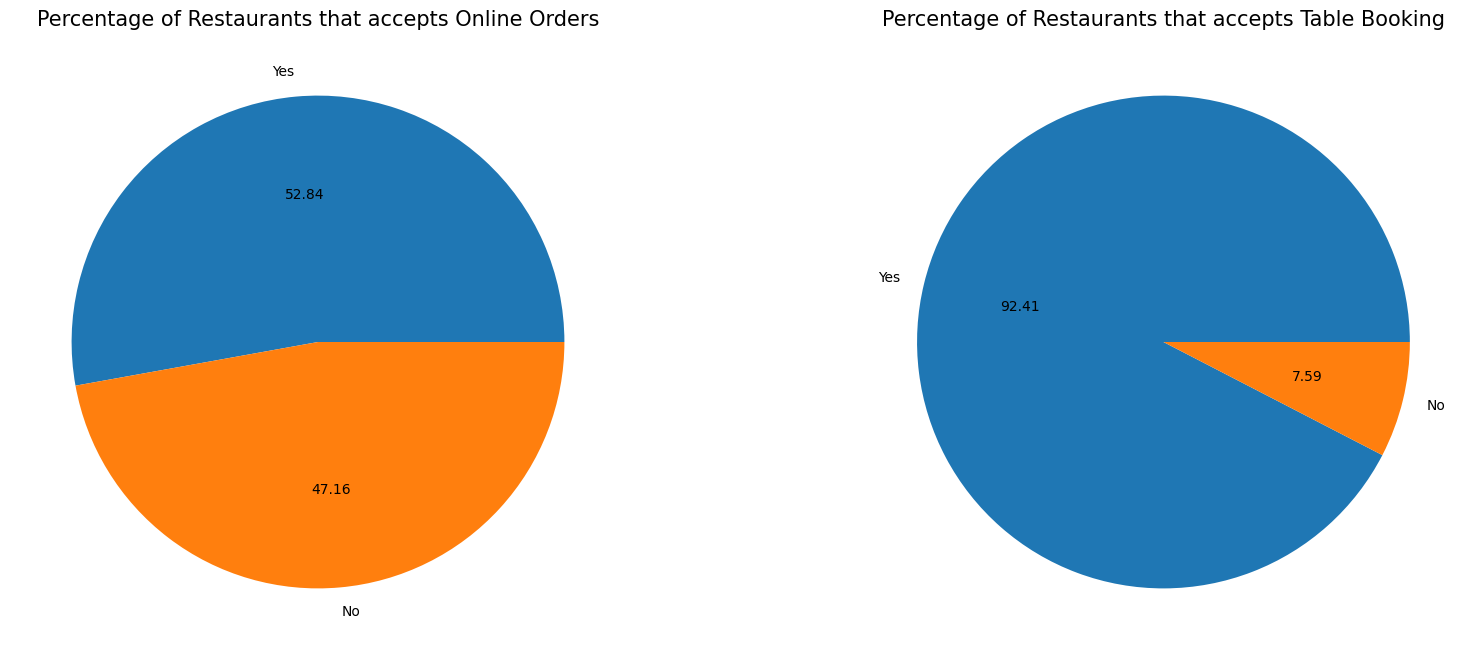

In [53]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Percentage of Restaurants that accepts Online Orders', fontsize=15)
plt.pie(df['online_order'].value_counts(), autopct='%0.2f', labels=['Yes','No'])


plt.subplot(1,2,2)
plt.title('Percentage of Restaurants that accepts Table Booking', fontsize=15)
plt.pie(df['book_table'].value_counts(), autopct='%0.2f', labels=['Yes','No'])
plt.show()

**Insight**


---


*   We need to find ways to boost Online Order acceptance.

---




#Top Cuisines

## By Restaurants

In [54]:
df.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7


---

We observe that each restaurant has a list of cuisines, so to be able to identify the Top cuisines, we need to explode cuisines for each restaurant.

---

In [55]:
top_cuisines_list = list(top_df['cuisines'].apply(lambda x : str(x).split(', ')))
top_cuisines_list[:5]

[['North Indian', 'Mughlai', 'Chinese'],
 ['Chinese', 'North Indian', 'Thai'],
 ['Pizza', 'Cafe', 'Italian'],
 ['Cafe', 'Italian', 'Continental'],
 ['Cafe', 'Mexican', 'Italian', 'Momos', 'Beverages']]

In [56]:
top_cuisines_df = top_df[['name','approx_cost(for two people)','rating']]
top_cuisines_df['cuisines'] = top_cuisines_list
top_cuisines_df = top_cuisines_df.explode('cuisines')
top_cuisines_df.head(10)

,name,approx_cost(for two people),rating,cuisines
0,Jalsa,800.0,4.1,North Indian
0,Jalsa,800.0,4.1,Mughlai
0,Jalsa,800.0,4.1,Chinese
1,Spice Elephant,800.0,4.1,Chinese
1,Spice Elephant,800.0,4.1,North Indian
1,Spice Elephant,800.0,4.1,Thai
7,Onesta,600.0,4.6,Pizza
7,Onesta,600.0,4.6,Cafe
7,Onesta,600.0,4.6,Italian
8,Penthouse Cafe,700.0,4.0,Cafe


In [57]:
top_cuisines_df = top_cuisines_df.groupby('cuisines').aggregate({'name':'count', 'approx_cost(for two people)':'median', 'rating':'median'}).reset_index().rename(columns={'name':'count'}).sort_values(by='count', ascending=False)
top_cuisines_df.head(3)

,cuisines,count,approx_cost(for two people),rating
67,North Indian,723,800.0,4.1
25,Chinese,452,800.0,4.1
27,Continental,398,1200.0,4.2


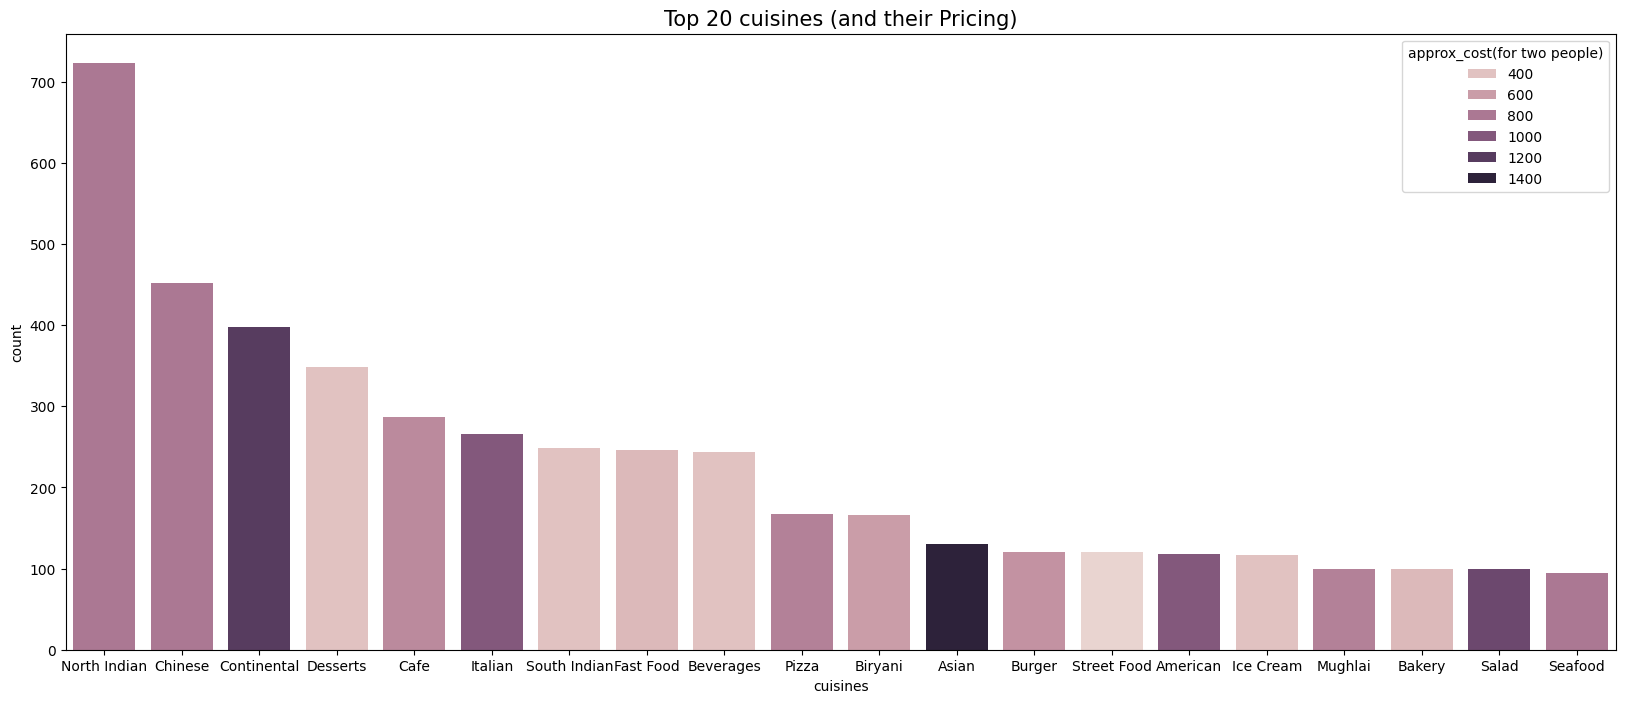

In [58]:
plt.figure(figsize=(20,8))
plt.title('Top 20 cuisines (and their Pricing)', fontsize=15)
sns.barplot(x='cuisines', y='count', data = top_cuisines_df[:20], hue='approx_cost(for two people)')
plt.show()

**Insight**


---


*   *North Indian* cuisine is the most popular.

*   *Asian* cuisine is the priciest among the Top cuisines.

*   *Street Food* is the most affordable among the Top cuisines.

---




##By ratings

In [59]:
top_cuisines_df = top_cuisines_df.sort_values(by='rating', ascending=False)
top_cuisines_df.head(4)

,cuisines,count,approx_cost(for two people),rating
2,African,3,1000.0,4.6
22,Cantonese,1,2800.0,4.6
87,Tex-Mex,5,1500.0,4.5
68,Parsi,1,1300.0,4.4


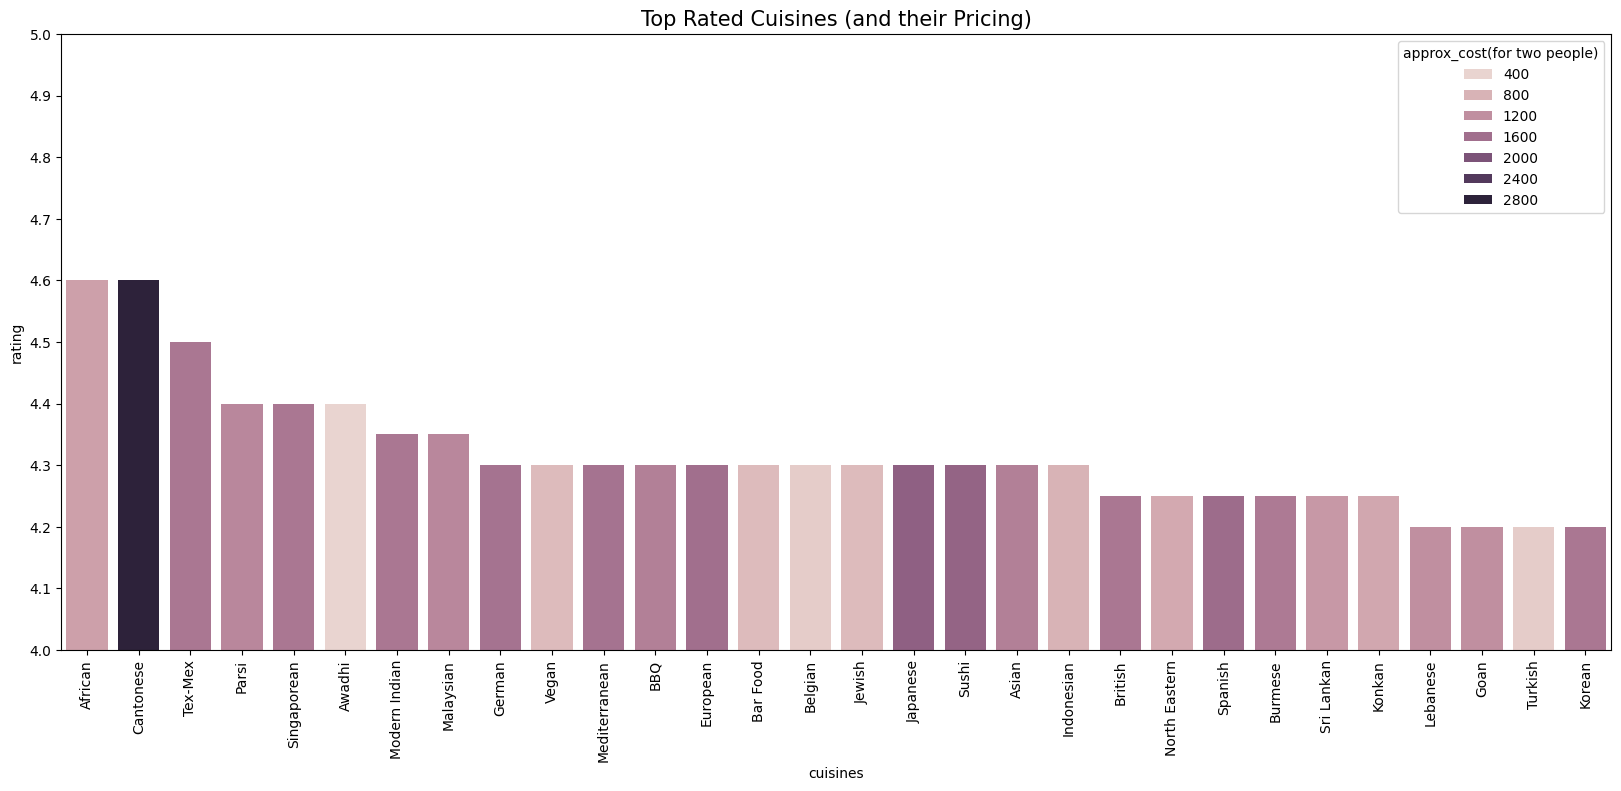

In [61]:
plt.figure(figsize=(20,8))
plt.title('Top Rated Cuisines (and their Pricing)', fontsize=15)
sns.barplot(x = 'cuisines', y = 'rating', data = top_cuisines_df[:30], hue='approx_cost(for two people)')

plt.ylim(4,5)
plt.yticks([4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5])
plt.xticks(rotation=90)
plt.show()

**Insight**

---

*   *African* and the *Cantonese* have the highest median rating.

*   *Cantonese* is the priciest cuisine in the list.

---



#Restaurant Rating vs Price

In [62]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In [63]:
rate_df = df[['name','rating','approx_cost(for two people)']]
rate_df

,name,rating,approx_cost(for two people)
0,Jalsa,4.1,800.0
1,Spice Elephant,4.1,800.0
2,San Churro Cafe,3.8,800.0
3,Addhuri Udupi Bhojana,3.7,300.0
4,Grand Village,3.8,600.0
...,...,...,...
12494,New Shalimar Hotel,0.0,300.0
12495,Nook - Aloft Bengaluru Cessna Business Park,4.2,1800.0
12496,SeeYa Restaurant,3.3,350.0
12497,Bhagini,2.5,800.0


---
We see that there are some restaurants with 0 Rating. For this analysis, let's drop them to get a clear picture.

---

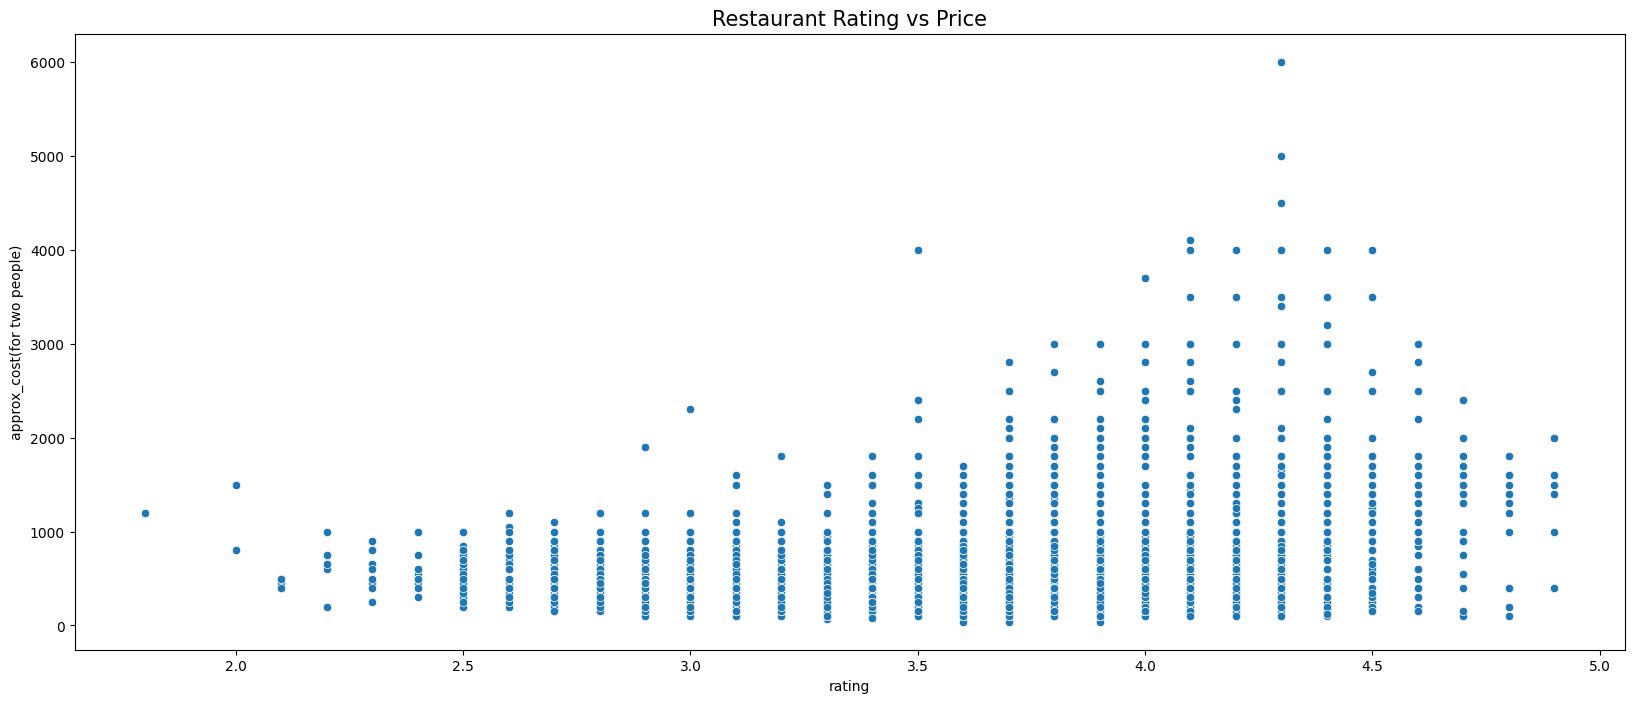

In [64]:
plt.figure(figsize=(20,8))
plt.title('Restaurant Rating vs Price', fontsize=15)
sns.scatterplot(x='rating', y='approx_cost(for two people)', data=rate_df[rate_df['rating']>0])
plt.show()

**Insight**

---

*   Restaurants that have rating *above 4.0* are available across all price points.

*   Top rated restaurants (*above 4.5*) have maximum pricing of INR *3000*, i.e, the priciest ones are not the highest rated.

*   However, premium customers (who spends *above INR 3000*) can expect a decent experience as the ratings are anywhere *between 4 to 4.5*.


---



#Map view

In [65]:
location = [x for x in top_df['location'].unique().tolist() if type(x) == str]
latitude = []
longitude =  []
for i in range(len(location)):
  if(type(location[i]) == str):
    ctr=0
    while True:
      try:
        address = location[i] + ', Bengaluru, India'
        geolocator = Nominatim(user_agent="ny_explorer")
        loc = geolocator.geocode(address)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
      except:
        ctr+=1
        if(ctr==7):
          print(i)
          latitude.append(0)
          longitude.append(0)
          break
        continue
      break

11


65


In [66]:
top_df['location_latitude'] = df['location'].map(dict(zip(location, latitude)))
top_df['location_longitude'] = df['location'].map(dict(zip(location, longitude)))

In [68]:
top_df_filtered = top_df.groupby('location').aggregate({'location_latitude':'first','location_longitude':'first'})#.reset_index()
top_df_filtered['restaurant_count'] = top_df.groupby('location').aggregate({'url':'count'})
top_df_filtered = top_df_filtered.reset_index()
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=12) # generate map centred around Bengaluru

states = folium.map.FeatureGroup()

for lat, lon in zip(top_df_filtered['location_latitude'],top_df_filtered['location_longitude']):
  states.add_child(folium.features.CircleMarker([lat,lon], radius=3, color='Red', fill=True))

for lat, lon in zip(top_df_filtered['location_latitude'],top_df_filtered['location_longitude']):
  states.add_child(folium.features.Marker([lat,lon], popup=top_df_filtered.index[1]))


venues_map.add_child(states)
venues_map

---
**These are the locations where restaurants rated 4+ are located.**

---

#Insight



---
*   Box-8 Desi Meals is the best restaurant with as many as 4 food items in the list of most liked dishes across various cuisines.

  > These food items are : Dal Makhani, Salads, Sandwiches and Biryani.

*   MTR is the best choice for South Indian cuisine.

*   Corner House is the go to place for Ice Creams.

*   Empire Restaurant is the Chicken lovers' paradise.

*   Mojo Pizza for Pizza and Onesta for Pasta are the favourite choice for Italian.

*   Faasos for rolls, California Burrito for Rice bowls and Behrouz Biryani for Gulab Jamun are the hidden gems.

---

*   Top voted restaurants are Byg Brewski Brewing Company, Toit and Truffles.

  > The restaurants topping this list are all in the price range of INR 1500 or less.

  > High Ultra Lounge, Hard Rock Cafe and Windmills Craftworks are the most priciest ones in this list.

---

*   The top rated restaurants are *Flechazo*, *Milano Ice Cream*, *Santa Spa Cuisine*, *Byg Brewski Brewing Company*, *Asia Kitchen by Mainland China*, *Belgian Waffle Factory*, *Punjab Grill* and *AB's - Absolute Barbecues*.

  >  The priciest restaurant in this category is *Rim Naam - The Oberoi*, but it's not the top rated.
  >  All the 4.9 rated restaurants have approx_cost(for two people) less than 2000.
  > Premium restaurants, where approx_cost(for two people) is more than INR 3000 aren't the Top rated ones; but they are all pretty decent with an average rating of 4.3.
---

*   Lavelle Road,MG Road and Residency Road are the priciest locations.

*   Koramangala, Whitefield, Electronic City, BTM, HSR and Marathahalli are the best locations having most number of restaurants.

  > Hence, to start a new restaurant, the best location can be selected from this list.

---

*   Cafe Coffee Day has the highest number of outlets and is also the priciest.

---

*   North Indian is the most popular while African and Cantonese are the highest rated cuisines.

---

*   Top rated restaurants (above 4.5) have a maximum pricing of INR 3000, i.e, the priciest ones are not the highest rated.

---


#Recommendations

---
*   We need to work on improving restaurant's online order acceptance. For this, we can run a campaign for promoting the restaurant's business.

*   Cafe Coffee Day and Box-8 are the best examples. We can examine their business models and help other restaurants with this information.

*   The best locations to open a new restaurant (in the price range of less than INR 3000) are : Koramangala, Whitefield, Electronic City, BTM, HSR and Marathahalli.

*   We need more restaurants offering North Indian cuisine with high rating (above 4.5).

---


